# Integración por Taylor

Aquí veremos un ejemplo sencillo de cómo integrar usando el método de Tayor en un problema de valor inicial, o sea, para una ecuación diferencial ordinaria con una condición inicial.

El punto de partida, y *absolutamente importante* en todo lo que sigue, es el [Teorema Fundamental de las Ecuaciones Diferenciales Ordinarias](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), (o teorema de existencia y unicidad de las EDOs):

#### Teorema

Consideren el problema de valores iniciales $y'(t)=f(t,y(t)),\ y(t_0)=y_0$. Suponemos que $f(t,y)$ es Lipschitz uniformemente continua en $y$ (lo que significa que hay una constante, independiente de $t$, que acota $f$ para todo intervalo de su dominio) y continua en $t$. Entonces, para algún valor $\varepsilon > 0$ existe una solución única $y(t)$ al problema de valor inicial en el intervalo $[t_0-\varepsilon, t_0+\varepsilon]$.

**Importante:** El teorema establece la existencia y unicidad de la solución en un intervalo de $t$ en torno al valor $t_0$ que especifica la condición inicial. Esto, sin embargo, **no** implica que la solución exista para todo tiempo $t>t_0$.

## Un ejemplo sencillo

El método de Taylor lo describiremos a través de un ejemplo. Concretamente, ilustraremos como integrar la ecuación diferencial

\begin{equation}
\dot{x} = f(x) = x^2,
\end{equation}

con $x(0) = 3$.

Antes de describir el método, vale la pena notar que esta ecuación la podemos resolver analíticamente. La solución, como se puede comprobar rápidamente es

\begin{equation}
x(t) = \frac{3}{1-3t}.
\end{equation}

Esta solución muestra que $x(t)\to\infty$ cuando $t\to 1/3$; esto es un ejemplo de que la solución $x(t)$ **no existe** para $t>1/3$. 


El punto importante de este comentario es que, sin importar el método de integración, si hiciéramos una integración "larga" usando un *paso de integración constante* (o sea, a partir de $x(t_k)$ obtenemos $x(t_{k+1})$, con $t_{k+1} = t_0 + (k+1)\delta t = t_k + \delta t$), el método continuará la integración más allá de $t=1/3$, que es hasta donde tiene sentido la solución, a menos de que tengamos la buena fortuna de caer exactamente en $t_n=1$. Esto es una *advertencia* de que uno debe ser extremandamente cuidadoso si considera pasos de integración constantes. 

Sin embargo, si tenemos un método de integración con paso adaptativo, hay esperanza de que este problema no ocurra.


La idea del método de Taylor es construir una solución (local en $t$) que aproxime muy bien la solución de la ecuación diferencial en alguna vecindad del punto inicial $t_0$. En particular, escribimos el polinomios (en torno a $t_0$), esto es

\begin{equation}
x(t) = \sum_{k=0}^\infty x_{[k]}(t_0)\, (t-t_0)^k,
\end{equation}

donde $x_{[k]}(t_0)$ es el coeficiente de Taylor de orden $k$. Esta solución cumple la condición inicial imponiendo $x_{[0]}(t_0) = x_0$. 
Excepto por $x_{[0]}(t_0)$, el resto de los coeficientes del desarrollo son por determinar, cosa que haremos iterativamente. 

Empezaremos considerando que $p$ es infinito, o sea, construiremos la solución analítica; después entraremos en las sutilezas de tener aproximaciones de orden finito.

### Solución a primer orden

Escribimos, como aproximación de primer orden a la solución en la forma $x(t) = x_0 + x{[1]}(t_0)\, (t-t_0) + \mathcal{O}((t-t_0)^2)$, y queremos obtener el valor de $x_{[1]}(t_0)$. De aquí, tenemos que $\dot{x} = x{[1]}+ \mathcal{O}((t-t_0))$, y sustituyendo en ambos lados de la ecuación diferencial obtenemos

\begin{eqnarray}
x{[1]} + \mathcal{O}((t-t_0)) & = & \big[x_0 + x{[1]}(t_0)\, (t-t_0) + \mathcal{O}((t-t_0)^2)\big]^2 \\
& = & x_0^2 + \mathcal{O}((t-t_0)).
\end{eqnarray}

De aquí concluimos que $x_{[1]}=x_0^2$.

Es importante notar que **no** necesitamos hacer el cálculo explícito del cuadrado de todo el polinomio; *únicamente* calculamos (y usamos) el término de orden cero en el lado derecho de la ecuación.

### Solución a segundo orden y órdenes mayores

Para la aproximación a segundo orden escribimos $x(t) = x_0 + x_0^2 (t-t_0) + x{[2]}(t-t_0)^2+\mathcal{O}((t-t_0)^3)$, donde queremos obtener $x_{[2]}(t_0)$. En este caso, la derivada es $\dot{x} = x_0^2 + x_{[2]}(t_0)\,(t-t_0) + \mathcal{O}((t-t_0)^2)$, y sustituyendo nuevamente en la ecuación diferencial obtenemos

\begin{eqnarray}
x_0^2 + 2 x_{[2]}(t_0)\,(t-t_0) + \mathcal{O}((t-t_0)^2) & = & \big[x_0 + x_0^2 (t-t_0) + x{[2]}(t-t_0)^2+\mathcal{O}((t-t_0)^3)\big]^2 \\
& = & x_0^2 + 2 x_0^3 (t-t_0) + \mathcal{O}((t-t_0)^2).
\end{eqnarray}

De aquí obtenemos $x_{[2]}(t_0) = x_0^3$. Nuevamente, vale la pena enfatizar que el lado derecho de la ecuación sólo se calcula a primer orden.

Para órdenes más altos, uno continua de igual manera: $x(t) = x_0 + x_0^2 (t-t_0) + x_0^3 (t-t_0)^2+ x{[3]}(t-t_0)^3+\mathcal{O}((t-t_0)^4)$, y al derivar y substituir $x^2$, se obtiene $x{[3]}(t_0)=x_0^4$. Y así se continua sucesivamente.

Finalmente, se obtiene que

\begin{eqnarray}
x(t) & = & x_0 + x_0^2 (t-t_0) + x_0^3 (t-t_0)^2 + x_0^4 (t-t_0)^3 + \dots \\
     & = & x_0 \big(1 + x_0 (t-t_0) + x_0^2 (t-t_0)^2 + \dots\big) = \frac{x_0}{1-x_0(t-t_0)},\\
\end{eqnarray}

donde $t$ está limitado por $t - t_0 = 1/x_0$. Esto coincide con el resultado analítico que se espera.

Vale la pena notar que, para que la serie converja absolutamente, se requiere que los términos sucesivos satisfagan ($t>t_0$)

\begin{equation}
\Big | \frac{ x_{[n]}(t_0)\, (t-t_0)^n }{x_{[n+1]}(t_0)\, (t-t_0)^{n+1}}\Big| = \frac{1}{|x_0|(t-t_0)} < 1,
\end{equation}

lo que define el radio de convergencia en $t$ de la serie.

## El método de Taylor

### Relaciones de recurrencia de los coeficientes de Taylor

En general, para la ecuación diferencial $\dot{x} = f(x(t))$ con $x_0=x(t_0)$, uno puede demostrar que los coeficientes $x_{[k]}$ están dados por

\begin{equation}
x_{[k]} = \frac{f_{[k-1]}}{k},
\end{equation}

donde los coeficientes $f_{[k']}$ son los coeficientes del desarrollo en serie de Taylor en $t-t_0$ de $f(x(t))$. Esta es una relación de recurrencia para $x_{[k]}$. Es claro que, dado que el lado derecho de la ecuación anterior involucra los coeficientes $f_{[k']}$, uno debe implementar funciones que permitan calcular dichos coeficientes.

### Paso de integración

Claramente, lo descrito más arriba no se puede implementar en la computadora. Es decir, estamos obligados a truncar el polinomio de Taylor en un grado $p$ (finito). Formalmente,  escribimos

\begin{equation}
x(t) = \sum_{k=0}^p x_{[k]}(t_0)\, (t-t_0)^k + \mathcal{R}_p ,
\end{equation}

donde el *residuo* está dado por

\begin{equation}
\mathcal{R}_p = x_{[p+1]}(\xi)\, (t-t_0)^{p+1},
\end{equation}
 y $\xi \in [t_0, t]$.

Queremos, entonces, truncar la serie en un $p$ finito, pero suficientemente grande de tal manera que el residuo sea pequeño.

¿Dónde truncamos? En general esto sólo lo podemos contestar si podemos conocer el residuo (en términos de $p$), cosa que no es sencilla. 

Es por esto que uno *usa* las propiedades de convergencia de la serie de Taylor para $x(t)$, para $p$ *suficientemente* grande. Si $p$ es suficientemente grande, entonces las correcciones sucesivas serán cada vez menores, ya que la serie es convergente. 

En particular, para $p$ suficientemente grande tendremos

\begin{equation}
\big| \, x_{[p]}(t_0)\, (t-t_0)^p \, \big| \leq \epsilon,
\end{equation}

donde $\epsilon$ es una cota, *suficientemente pequeña*, para *todos* los términos sucesivos.

De aquí obtenemos una cota para el paso de integración $h=t-t_0$,

\begin{equation}
h = t-t_0 \leq \Big(\frac{\epsilon}{\big| x_{[p]}(t_0)\big|}\Big)^{1/p}.
\end{equation}

Uno elige $\epsilon$ para que sea mucho menor que el epsilon de la máquina. 

El paso de integración obtenido depende de $t_0$; por lo tanto, al hacer la evolución temporal, distintos pasos de integración se irán calculando, por lo que el paso de integración en general no será constante.

Algo importante que vale la pena hacer notar es que, fijando $h$ de tal manera que se garantiza la convergencia de la serie, la serie de Taylor se aplica a todo valor de $t$ tal que $t_0 \leq t \leq t_0 + h$.

En la práctica, y dado que normalmente uno lidia con ecuaciones de segundo orden, uno considera el menor de los pasos de integración obtenidos a partir de los dos últimos términos de la serie de Taylor.

Es *importante* enfatizar que este procedimiento sólo funciona cuando el orden $p$ es suficientemente grande, de tal manera que estamos entrados en la cola convergente de la serie. 

### Sumando la serie

Una vez que tenemos el paso de integración $h$, queremos sumar la serie para obtener $x(t_1)$ con $t_1 = t_0+h$. Para esto, simplemente debemos sumar la serie

\begin{equation}
x(t_1) = x(t_0+h) = \sum_{k=0}^p x_{[k]}(t_0)\, h^k.
\end{equation}

Numéricamente, la mejor manera de hacer esto es usando [el método de Horner](https://en.wikipedia.org/wiki/Horner%27s_method). El método de Horner consiste en factorizar de manera apropiada el polinomio, el cual sólo se evalúa a través de productos y sumas (¡sin potencias!). Esto permite, por un lado, minimizar el número de operaciones, y en el caso de series de Taylor de orden suficientemente grande para estar en la cola convergente, considerar correctamente los términos pequeños.

Reescribiendo la serie tenemos

\begin{eqnarray}
x(t_1) & = & x_0 + x_{[1]} \, h + \dots + x_{[p-1]} \,h^{p-1} + x_{[p]} \, h^p\\
& = & x_0 + x_{[1]} \, h + \dots + h^{p-1} ( x_{[p-1]} + h x_{[p]} )\\
& = & x_0 + x_{[1]} \, h + \dots + h^{p-2} ( x_{[p-2]} + h ( x_{[p-1]} + h x_{[p]} ) )\\
& = & x_0 + h\big( x_{[1]} + h(... + h ( x_{[p-1]} + h x_{[p]} )...\big).
\end{eqnarray}

Entonces, consideramos primero (para la suma) el término $x_{[p]}$ y $x_{[p]}$, a partir de los cuales construimos $\tilde{x}_{p-1} = x_{[p-1]} + h x_{[p]}$, y usando $\tilde{x}_{p-1}$ obtenemos $\tilde{x}_{p-2} = x_{[p-2]} + h \tilde{x}_{p-1}$, y así sucesivamente hasta tener $\tilde{x}_0=x(t_1)$, que es el resultado buscado.

Una vez que hemos obtenido $x(t_1)$, uno utiliza este valor como la nueva condición inicial, y simplemente se iteran los pasos anteriores hasta obtener $x(t_2)$.

## Tarea 7

**NOTA** El contenido de este ejercicio se incluirá en la "Tarea7.ipynb". Nuevamente, esta tarea deberá ser elaborada en equipos.

### Ejercicio

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio, que obtuvieron en la "Tarea6", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}(t_0)$ de la expansión. Esta función deberá llamar a otra donde se implementan las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$.

- Otra función donde se haga la suma por el método de Horner.

- Finalmente, una función que use las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde hay problemas).


Dado que conocemos la solución analítica, den como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

In [1]:
include("Taylor_V2.jl")
import AD: Taylor
using PyPlot

    ^(AD.Taylor, #T<:Number) at /Users/feruchan/2016-2/Sistemas/Daniel/2016-2_TSFisicaComputacional/tareas/danmarurr/Taylor_V2.jl:306
is ambiguous with: 
    ^(Any, Integer) at intfuncs.jl:108.
To fix, define 
    ^(AD.Taylor, _<:Integer)
before the new definition.


In [2]:
"""
Función que calcula los coeficientes x_k en el tiempo t_0
"""
function coef_t{T<:Real}(f::Function, ci::T, p::Int)
    #Bautizemos al arreglo
    arr = [ci]
    for j in 1:p
        x = Taylor(arr)
        fx = f(x)
        arr = push!(arr, fx.coef[j]/j)
    end
    Taylor(arr)
end

"""
Función que obtiene el paso de integración
"""
function paso_int(x_0::Taylor, p::Int)
    h1 = 0.5*(eps(1.0)/abs(x_0.coef[p + 1]))^(1/p) 
    h2 = 0.5*(eps(1.0)/abs(x_0.coef[p]))^(1/(p-1))
    minimum([h1, h2])
end

"""
Función para desarrollar la suma con el método de Horner
"""
function Horner{T<:Real}(x_0::Taylor, h::T)
    n = x_0.order
    suma = zeros(n)
    suma[1] = x_0.coef[n]
    for j in 2:n
        suma[j] = x_0.coef[n + 1 - j] + h*suma[j - 1]
    end
    suma[n]
end   

"""
Función que integra para resolver la ec. diferencial x'(t) = f(x(t)) del tiempo t0 a tf con condición inicial
x(t0) = x0 y a orden p, la función regresa dos arreglos: `ts` y `xs` los cuales contienen la información de los 
tiempos y los valores de la solución respectivamente.

Se recomienda que p sea grande para minimizar el error.
"""
function Integrador_1{T<:Real, S<:Real}(f::Function, t0::T, tf::T, x0::S, p::Int)
    #Creamos los arreglos con los tiempos y las soluciones
    xs = Float64[x0]
    ts = Float64[t0]
    t = t0
    x = x0
    while t <= tf
        xt = coef_t(f, x, p)
        h = paso_int(xt, p)
        t += h
        x = Horner(xt, h)
        #Lo siguiente lo hacemos para evitar que la solución tenga valores que no queremos,
        #pues si éstos aparecen, obliga a detener el proceso
        #if isnan(x) | (x == Inf) | (x == -Inf)
        #    return ts, xs
        #    break
        #end
        xs = push!(xs, x)
        ts = push!(ts, t)
    end
    ts, xs
end

Integrador_1 (generic function with 1 method)

In [3]:
#Ahora chequemos si éstas cosas funcionan, usando la función x^2
f(x) = x^2
t1, x1 = Integrador_1(f, 0.0, 0.5, 3, 20);

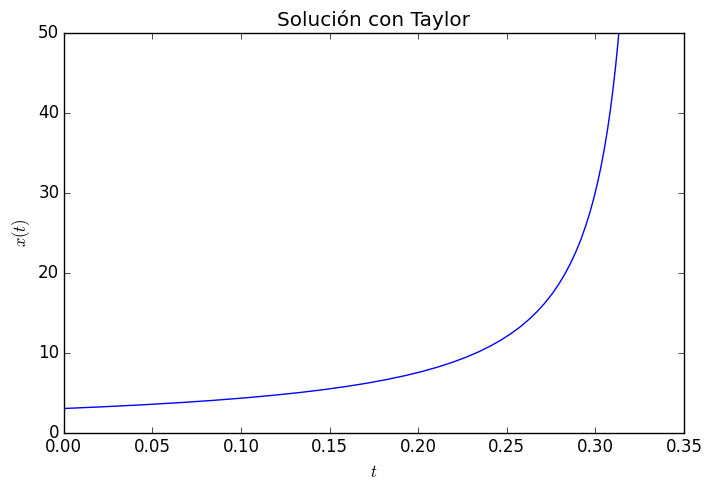

PyObject <matplotlib.text.Text object at 0x319e82dd0>

In [5]:
figure(figsize = (8,5))
plot(t1, x1)
ylim(0,50)
title("Solución con Taylor")
xlabel(L"t")
ylabel(L"x(t)")

Comparamos el resultado obtenido, con la solución analítica:
$$ g(t) = \frac{3}{1-3t}$$
Obteniendo el __error relativo__ .

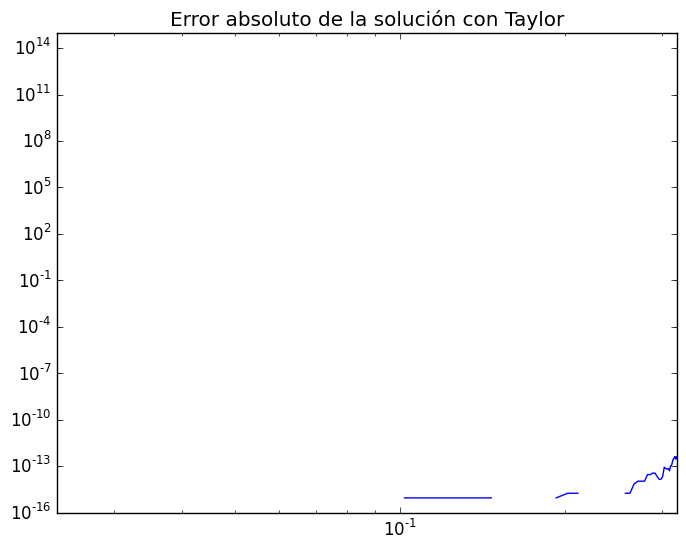

(0.023597475157335113,0.32)

In [7]:
g(t) = 3/(1 - 3t)   #solucion analitica
sol = map(g, t1)    #mapeo de la solucion en el arreglo de tiempos de la solucion con taylor.
err = abs(sol - x1);
loglog(t1, err)     #Grafico logaritmico
title("Error absoluto de la solución con Taylor")
xlim(0,0.32)

Observamos que el __error máximo__ es del orden de $10^{-11}$. Una aproximación bastante aceptable..

### Ejercicio

Repitan los cálculos usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

In [8]:
"""
RK4 Resuelve la ecuación diferencial `x' = f(x, t)` en el intervalo [t0, tf] usando un paso de integración `dt`,
x puede ser un número o un vector, la solución es entregada de la forma ts, xs
"""
function RK4{T<:Real}(f::Function, t0::T, tf::T, x0, dt = 5e-3)
    k1(x, t) = dt*f(x, t)
    k2(x, t) = dt*f(x + k1(x, t)/2, t + dt/2)
    k3(x, t) = dt*f(x + k2(x, t)/2, t + dt/2)
    k4(x, t) = dt*f(x + k3(x, t), t + dt)
    time = Float64[t0:dt:tf]
    if time[end] != tf
        push!(time, tf)
    end
    n = length(time)
    x_t = typeof(x0)[x0]
    for r in 2:n
        x_ant = x_t[end]
        t_ant = time[end]
        x_next = x_ant
        x_next = x_next + (k1(x_ant, t_ant) + 2*k2(x_ant, t_ant) + 2*k3(x_ant, t_ant) + k4(x_ant, t_ant))/6
        #Usemos lo mismo que en el caso anterior para evitar que la solución tenga cosas que no tienen sentido
        #es decir: NaN o +-Inf
        #if isnan(x_next) | (x_next == Inf) | (x_next == -Inf)
        #   ts = Float64[time[j] for j in 1:(r-1)]
        #    return ts, x_t
        #    break
        #end
        push!(x_t, x_next)
    end
    return time, x_t
end

RK4 (generic function with 2 methods)

In [9]:
#Ahora chequemos si éstas cosas funcionan, usando la función x^2
f(x, t) = x^2
t2, x2 = RK4(f, 0.0, 0.5, 3.0);

 in depwarn at deprecated.jl:73
 in getindex at deprecated.jl:663
 in RK4 at In[8]:10
 in RK4 at In[8]:6
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/feruchan/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/feruchan/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[9], in expression starting on line 3


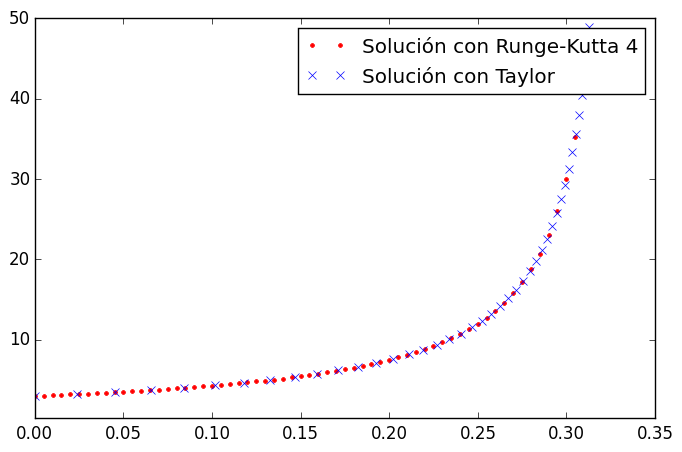

PyObject <matplotlib.legend.Legend object at 0x31dbd5ed0>

In [14]:
figure(figsize = (8,5))
#plot(t2, x2, label= "Solución con Runge-Kutta 4", marker = ".", linestyle = "")
plot(t2, x2, "r.", label= "Solución con Runge-Kutta 4")
#plot(t1, x1, label="Solución con Taylor", marker ="o", linestyle = "")
plot(t1, x1, "bx", label="Solución con Taylor")
ylim(0.2,50)
legend()

Notamos que la solución con __Taylor__ se detiene cerca de 0.3333..., que es donde ocurren la singularidad.

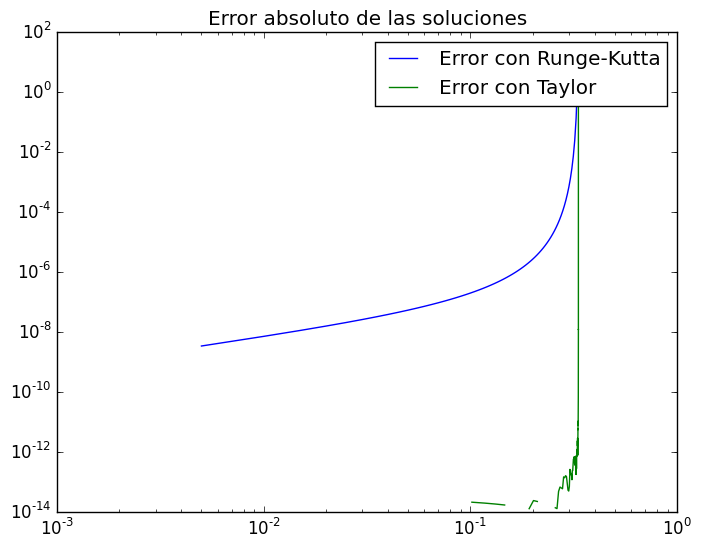

PyObject <matplotlib.legend.Legend object at 0x31d4450d0>

In [15]:
#Obtengamos el error absoluto de la solución con Taylor
g(t) = 3/(1 - 3t)
sol2 = map(g, t2)
err2 = 100*abs(sol2 - x2)./sol2;
sol = map(g, t1)
err = 100*abs(sol - x1)./sol;
loglog(t2, err2, label ="Error con Runge-Kutta")
loglog(t1, err, label ="Error con Taylor")
title("Error absoluto de las soluciones")
legend()


Con __Runge Kutta__ el error mínimo que podemos obtener es de $10^{-8}$, ¡6 órdenes de magnitud más grande! que el obtenido con Taylor ($10^{-14}$).

### Ejercicio

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo para ambos métodos.

Para usar el método de Taylor será conveniente usar una coord

In [16]:
#Función de integración de segundo orden
function Integrador_2{T<:Real, S<:Real}(f::Function, t0::T, tf::T, x0::S, v0::S, p::Int)
    #Creamos los arreglos con los tiempos y las soluciones
    vs = Float64[v0] #arreglo inicial para las velocidades
    xs = Float64[x0] #arreglo inicial para las posiciones
    ts = Float64[t0] #arreglo inicial para los tiempos
    
    t = t0           #.....
    x = x0           #Condiciones iniciales
    v = v0           #.....
    
    while t <= tf
        v1 = Float64[v]
        x1 = Float64[x]
        for j in 1:p
            vt = Taylor(v1)
            xt = Taylor(x1)
            ft = f(xt)
            v1 = push!(v1, ft.coef[j]/j)
            x1 = push!(x1, vt.coef[j]/j)
        end
        vt = Taylor(v1)
        xt = Taylor(x1)
        h1 = paso_int(xt, p)
        h2 = paso_int(vt, p)
        h = minimum([h1, h2])
        t += h
        x = Horner(xt, h)
        v = Horner(vt, h)
        #@show v, x
        #Lo siguiente lo hacemos para evitar que la solución tenga valores que no queremos,
        #pues si éstos aparecen, obliga a detener el proceso
        #if isnan(x) | (x == Inf) | (x == -Inf)
        #    return ts, xs
        #    break
        #end
        vs = push!(vs, v)
        xs = push!(xs, x)
        ts = push!(ts, t)
    end
    ts, xs, vs #devuelve tiempo, posición y velocidad.
end

Integrador_2 (generic function with 1 method)

Definimos la ecuación:
$$z(x) = -2x$$
En un tiempo __tf__ de $\frac{2 \pi}{\sqrt{2}}\times 10^4$.

In [22]:
z(x) = -2x #Funcion del oscilador
tf = 2π*1e4/sqrt(2) #Tiempo final

#Usamos nuestro integrador
p_orden = 20
to, xo, vo = Integrador_2(z, 0.0, tf, 2.0, 0.0, p_orden);

Calculando la solución analítica de $\ddot{x}(t) = -2x$:

\begin{align}
x(t) &= C_1 sin(\sqrt(2) ~t) + C_2 cos(\sqrt(2) ~t) \\
x(0) &= 2 \\
\dot{x} (0) &= 0 
\end{align}

\begin{align}
\Rightarrow C_1 &= 0 \\
C_2 &= 2
\end{align}

\begin{equation}
x(t) = 2 ~cos(\sqrt{2}~t)
\end{equation}

Obtenemos el valor relativo entre la solución de __Taylor__ y la analítica.

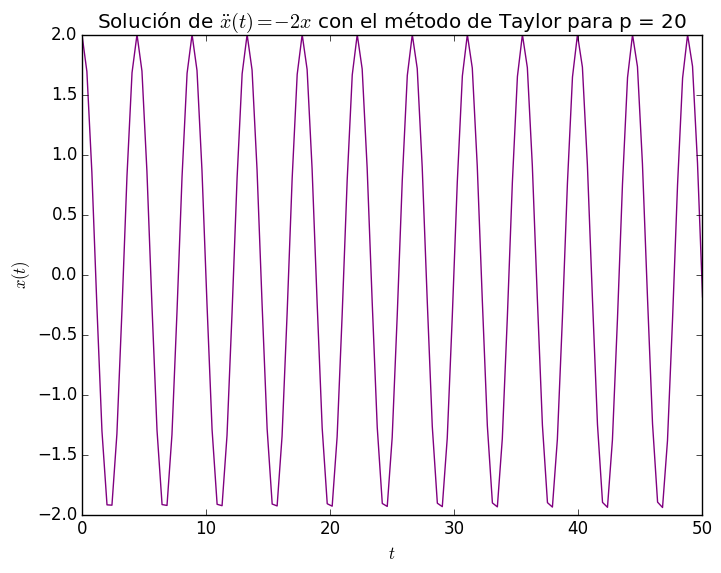

(0,50)

In [47]:
plot(to[1:1000], xo[1:1000], "-", color="purple") #Nos quedamos con 1000 puntos para no pedirle de más a PyPlot.
o(t) = 2*cos(sqrt(2)*t) #Implementamos la solucion analítica
so = map(o, to[1:1000]) #mapeamos la solucion analitica en el mismo intervalo de tiempo
eroa = abs(so - xo[1:1000]) #calculamos el error relativo


title(L"Solución de $\ddot{x}(t) = -2x$ con el método de Taylor para p = 20")
xlabel(L"t")
ylabel(L"x(t)")
xlim(0, 50)



Sip... parece algo que oscila armónicamente.

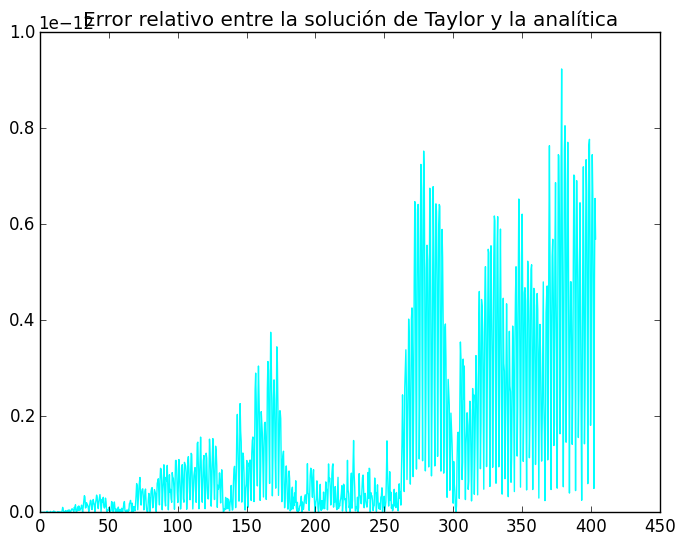

PyObject <matplotlib.text.Text object at 0x3203d4fd0>

In [46]:
plot(to[1:1000], eroa, color="cyan")
title("Error relativo entre la solución de Taylor y la analítica")

El máximo de este error es del orden de ¡$10^{-12}$!.

Para implementar Runge-Kutta consideramos el siguiente sistema de ecuaciones diferenciales:
\begin{align}
\dot{x}(t,x) &= v(t,x) \\
\dot{v}(t,x) &= -2x
\end{align}

In [48]:
#Escribimos una función que lo regrese...
function oscilador(x, t)
    x0, v0 = x
    [v0, -2x0]
end

oscilador (generic function with 1 method)

In [50]:
#Aplicamos Runge-Kutta
to2, xo2 = RK4(oscilador, 0.0, tf, [2.0,0.0], 0.01)
pos = Float64[x[1] for x in xo2]; #(x02 es un arreglo de vectores (posición, velocidad))

 in depwarn at deprecated.jl:73
 in getindex at deprecated.jl:663
 in RK4 at In[8]:10
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/feruchan/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/feruchan/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[49], in expression starting on line 2


4442884-element Array{Float64,1}:
 2.0    
 1.9998 
 1.9992 
 1.9982 
 1.9968 
 1.995  
 1.9928 
 1.99021
 1.98721
 1.98382
 1.98003
 1.97585
 1.97127
 ⋮      
 1.97611
 1.98027
 1.98404
 1.98741
 1.99038
 1.99295
 1.99512
 1.9969 
 1.99827
 1.99925
 1.99982
 2.0    

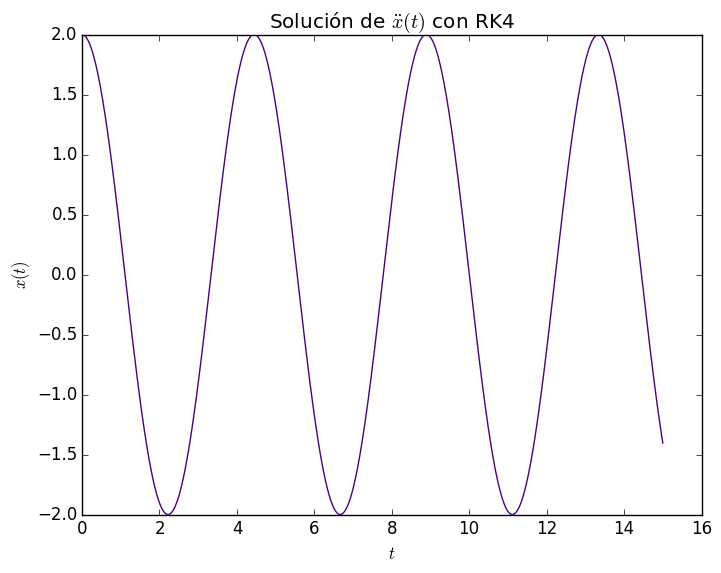

PyObject <matplotlib.text.Text object at 0x321338d90>

In [55]:
plot(to2[1:1500], pos[1:1500],"-" , color="indigo")
title(L"Solución de $\ddot{x}(t)$ con RK4 ")
xlabel(L"t")
ylabel(L"x(t)")

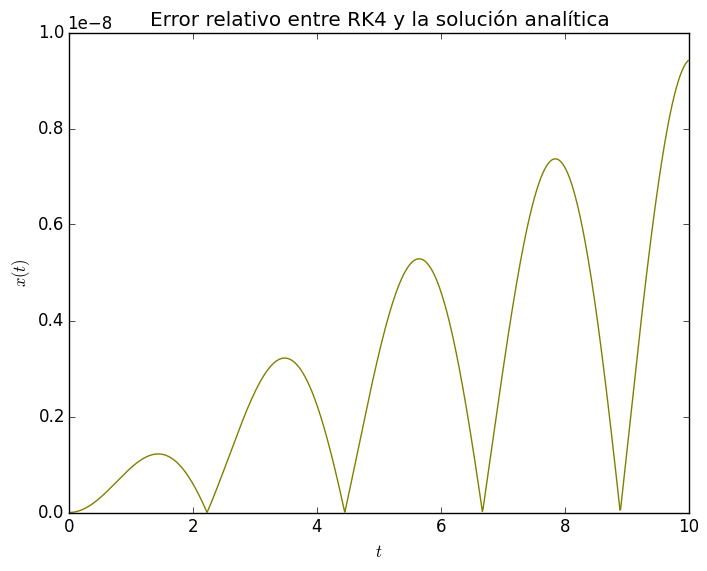

PyObject <matplotlib.text.Text object at 0x31dd6d410>

In [62]:
so2 = map(o, to2[1:1000]) #mapeamos la solucion analitica en el nuevo intervalo de tiempos de RK4
eroa2 = Float64[abs(so2[j] - pos[j]) for j in 1:1000] #Calculamos el error
plot(to2[1:1000], eroa2, color="olive")
title("Error relativo entre RK4 y la solución analítica")
xlabel(L"t")
ylabel(L"x(t)")

El error máximo entre __RK4__ y la solución analítica es del orden de $10^{-8}$. Cuatro órdenes de magnitud más grande que con el método de Taylor.

Otros detalles sobre ese método son: el tiempo y la sensibilidad de la solución a la elección del paso $h$, que debe de ser _relativamente_ pequeño. Para el tiempo final de $t_f \sim 10^4 s$, no está padre esperar años por una solución... implementar una $h$ decente _alarga_ casi al infinito el tiempo que hay que esperar por ella.

Para la Energía usamos la expresión de energía total de un oscilador armónico, haciendo $m=1$.

\begin{equation}
    E(x(t),v(t)) = E(t) = \frac{1}{2}v(t)^2 + x(t)^2
\end{equation}

Esta energía debería ser constante _todo el tiempo_, siendo al tiempo inicial $E(x_0, v_0) = E(0,2) = 4$. Podemos, entonces, calcular el _error relativo_ entre la energía obtenida por los métodos de RK4 y Taylor.

In [68]:
#Función de Energía
function Energia_osc(xs, vs)
    E = zeros(xs)
    for j in 1:length(xs)
        E[j] = vs[j]^2/2 + xs[j]^2
    end
    E
end

Energia_osc (generic function with 1 method)

In [72]:
vel = Float64[x[2] for x in xo2]; #Runge-Kutta devuelve un x02 vector...recordemos.

E1 = Energia_osc(pos, vel); #para RK4
E2 = Energia_osc(xo, vo);  #para Taylor

110048-element Array{Float64,1}:
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 ⋮  
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0
 4.0

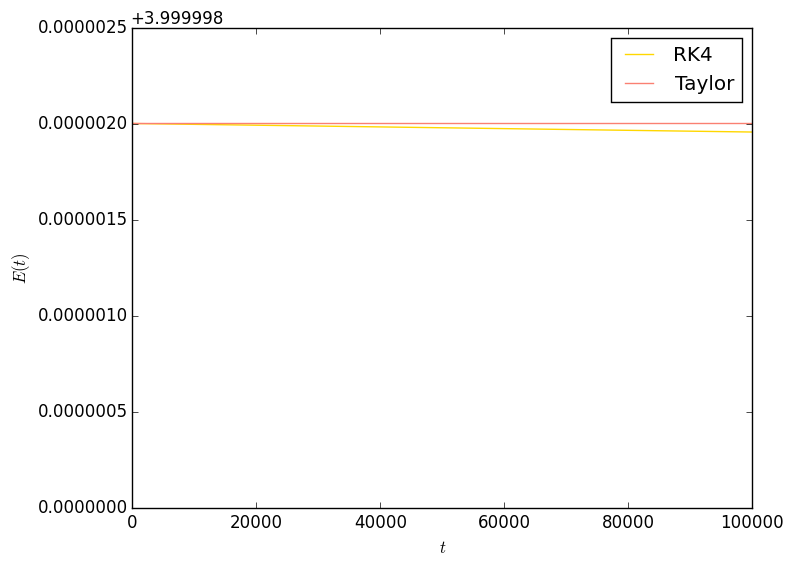

PyObject <matplotlib.legend.Legend object at 0x415f4eb90>

In [107]:
plot(E1, color = "gold", label="RK4")
plot(E2, color = "salmon", label="Taylor")
xlim(0,1e5)
xlabel(L"t")
ylabel(L"E(t)")
legend()

Notamos que ambas energías comienzan en $E=4$, pero la de Runge-Kutta comienza a _caer_.

In [69]:
# Calculo de errores relativos respecto a la energía
ee = abs(E2 - 4);  #para Taylor
ee2 = abs(E1 - 4); #para RK4

4442884-element Array{Float64,1}:
 0.0        
 4.44089e-13
 8.88623e-13
 1.3336e-12 
 1.77769e-12
 2.22178e-12
 2.66676e-12
 3.11084e-12
 3.55538e-12
 3.99991e-12
 4.44444e-12
 4.88853e-12
 5.33351e-12
 ⋮          
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97456e-6 
 1.97457e-6 
 1.97457e-6 
 1.97457e-6 

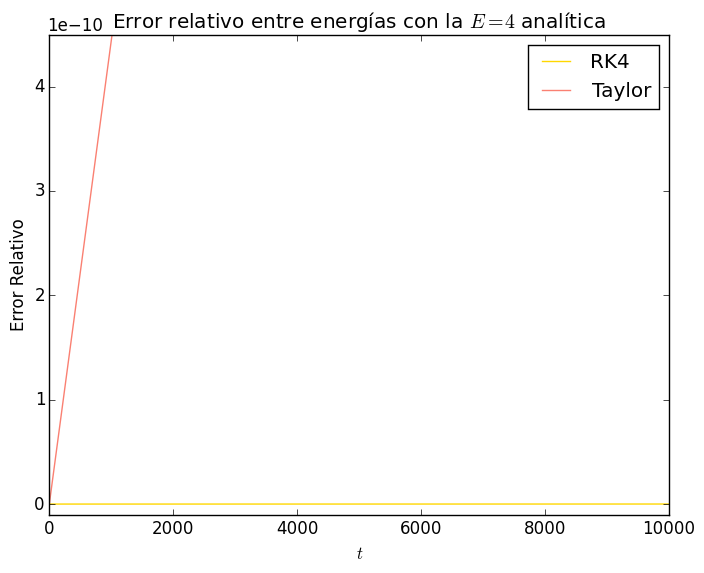

PyObject <matplotlib.legend.Legend object at 0x4164feed0>

In [116]:
plot(ee[1:10000], color="gold", label="RK4")
plot(ee2[1:10000], color="salmon", label="Taylor")
ylim(-1e-11, 4.5e-10) #esto hace que el grafico se vea mejor
title(L"Error relativo entre energías con la $E=4$ analítica")
xlabel(L"t")
ylabel("Error Relativo")
legend()

Ahora es más claro que el método de __Runge-Kutta__ no _conserva_ la energía para tiempos muy _grandes_. En cambio, __Taylor__, sí. 